In [340]:
# Round robin

import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

numtrials = 1000

In [341]:
countries = [
    'Argentina', 
    'Brazil', 
    'Colombia', 
    'Uraguay', 
    'Ecuador', 
    'Mexico', 
    'Panama', 
    'Morocco', 
    'Egypt', 
    'Spain', 
    'UK', 
    'Italy', 
    'France', 
    'Germany', 
    'Netherlands', 
    'Japan', 
    'South Korea', 
    "Australia", 
    'Turkey', 
    'New Zealand'
]

countriesratings = {
    'Argentina': 2140, 
    'Brazil': 1994, 
    'Colombia': 1953, 
    'Uraguay': 1922, 
    'Ecuador': 1911, 
    'Mexico': 1817, 
    'Panama': 1724, 
    'Morocco': 1807, 
    'Egypt': 1668, 
    'Spain': 2150, 
    'UK': 2012, 
    'Italy': 1914, 
    'France': 2031, 
    'Germany': 1988, 
    'Netherlands': 1967, 
    'Japan': 1875, 
    'South Korea': 1745, 
    "Australia": 1736, 
    'Turkey': 1837, 
    'New Zealand': 1596
}

In [342]:
def winrate(country1, country2):
    return (1/(1 + 10**((countriesratings[country2]-countriesratings[country1])/400)))

In [343]:
def simulate_match(country1, country2):
    
    percent1 = winrate(country1, country2)
    
    if random.random() < percent1:
        result = 'win'
    else:
        result = 'loss'
    
    if result == 'win':
        return country1, 3, country2, 0  # country1 wins, gets 3 points, country2 gets 0
    elif result == 'loss':
        return country1, 0, country2, 3  # country2 wins, gets 3 points, country1 gets 0
    else:
        return country1, 1, country2, 1  # Draw, both get 1 point each

In [344]:
def simulate_tournament(countries):
    # Initialize a dictionary to store the points of each country
    standings = {country: {'wins': 0, 'losses': 0, 'draws': 0, 'points': 0} for country in countries}
    
    # Iterate over all pairs of countries (round robin)
    for i in range(len(countries)):
        for j in range(i + 1, len(countries)):
            country1 = countries[i]
            country2 = countries[j]
            
            # Simulate match between country1 and country2
            country1_wins, country1_points, country2_wins, country2_points = simulate_match(country1, country2)
            
            # Update the standings
            standings[country1]['points'] += country1_points
            standings[country2]['points'] += country2_points
            
            if country1_points == 3:
                standings[country1]['wins'] += 1
                standings[country2]['losses'] += 1
            elif country2_points == 3:
                standings[country2]['wins'] += 1
                standings[country1]['losses'] += 1
            else:
                standings[country1]['draws'] += 1
                standings[country2]['draws'] += 1
    
    return standings


In [345]:
def display_standings(standings):
    # Convert the standings dictionary to a DataFrame for better visualization
    df = pd.DataFrame(standings).T  # Transpose so countries are rows
    df = df.sort_values(by=['points', 'wins'], ascending=False)  # Sort by points, then by wins
    return df


In [346]:
avgstandings = {country: 0 for country in countries}

for i in range(numtrials):
    standings = simulate_tournament(countries)
    sorted_countries = sorted(standings.keys(), key=lambda x: standings[x]['points'], reverse=True)
    
    for j in range(len(sorted_countries)):
        avgstandings[sorted_countries[j]] += (j+1)
    
for country, ranking in avgstandings.items():
    avgstandings[country] = ranking/numtrials
    
# tournament_results = display_standings(standings)
# tournament_results

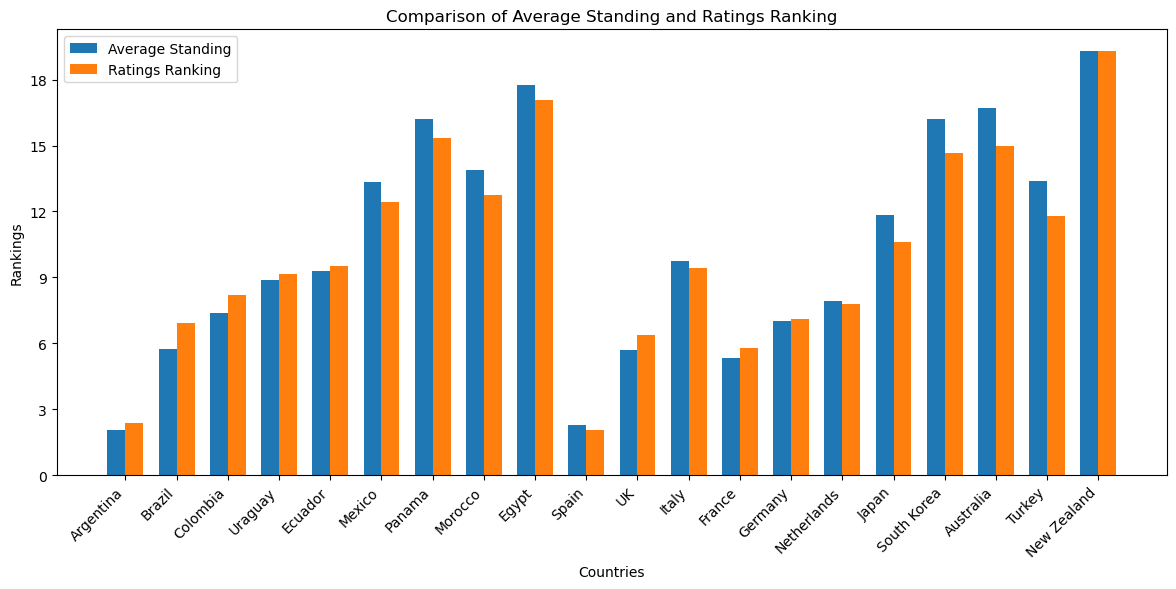

In [347]:
# ---------------------------- PLOTTING ---------------------------------
# Calculate rankings based on countriesratings
ratings_ranking = {country: rank for rank, country in enumerate(sorted(countriesratings, key=countriesratings.get, reverse=True), start=1)}


# Prepare data for the bar graph
avg_standings_values = [avgstandings[country] for country in countries]

# Perform max-min normalization for ratings
min_avg_standing = min(avg_standings_values)
max_avg_standing = max(avg_standings_values)

normalized_ratings = {
    country: max_avg_standing - ((max_avg_standing - min_avg_standing) * (countriesratings[country] - min(countriesratings.values())) / 
                                 (max(countriesratings.values()) - min(countriesratings.values())))
    for country in countries
}

ratings_ranking_values = [normalized_ratings[country] for country in countries]



x = np.arange(len(countries))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, avg_standings_values, width, label='Average Standing')
rects2 = ax.bar(x + width/2, ratings_ranking_values, width, label='Ratings Ranking')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Countries')
ax.set_ylabel('Rankings')
ax.set_title('Comparison of Average Standing and Ratings Ranking')
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=45, ha='right')
ax.legend()
fig.tight_layout()

ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()